# Keyword

1. HTML
2. Inspect
3. Selector

#### Import Library

In [40]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Coba Tes Request Ke Website

In [46]:
url = 'https://lifepal.co.id/media/bengkel-mobil-surabaya/'
response = requests.get(url)
response

<Response [200]>

### Baca Keseluruhan DOC HTML

In [24]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>
<html lang="id-ID"><head><link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/><title>Daftar Bengkel Mobil Surabaya – Alamat, Jenis Layanan, dan Biaya Servis</title><script async="">
                (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
                j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
                'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
                })(window,document,'script','dataLayer', 'GTM-PV336L7');
              </script><noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id='GTM-PV336L7'" style="display:none;visibility:hidden" width="0"></iframe></noscript><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><meta conte

### Scrape Data Dari Table

In [51]:
table = soup.find('table')
table

<table><tbody><tr><td><b>Bengkel Mobil di Surabaya</b></td><td><b>Alamat Bengkel</b></td><td><b>Fasilitas Bengkel</b></td></tr><tr><td><span style="font-weight:400">Bengkel mobil resmi Astra Peugeot Surabaya</span></td><td><span style="font-weight:400">Jalan Raya Jemur Sari No.40, Jemur Wonosari, Wonocolo, Kota Surabaya 60237 – (031) 848 2206</span></td><td><span style="font-weight:400">Melayani perbaikan dan servis untuk semua mobil merek Peugeot dengan kerusakan ringan hingga berat. </span> <p><span>Bengkel ini turut melayani penjualan </span><i><span style="font-weight:400">spare part </span></i><span>dan unit mobil Peugeot baru.</span></p> <p><span>Operasional hari Senin-Sabtu dari pukul 08.00 – 16.00, hari Minggu tutup.</span></p></td></tr><tr><td><span style="font-weight:400">Bengkel mobil resmi Mercedes Benz – PT Kedaung Satrya Motor</span></td><td><span style="font-weight:400">Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sawahan, Kota Surabaya 60224 – (031) 566 0000</span></td><

### Karena Kita hanya butuh nama-alamat-kontak, jadi tentukan kolom yang kita butuhkan

In [52]:
#karena tidak ada th jadi kita ceknya menggunakan tag tr index ke 0 dan value text pada tag td
headers = table.find_all('tr')[0].find_all('td')  
headers

[<td><b>Bengkel Mobil di Surabaya</b></td>,
 <td><b>Alamat Bengkel</b></td>,
 <td><b>Fasilitas Bengkel</b></td>]

In [27]:
header_names = [header.text for header in headers]
header_names

['Bengkel Mobil di Surabaya', 'Alamat Bengkel', 'Fasilitas Bengkel']

### Definisikan Targeted Column

In [28]:
target_columns = [header_names[0], header_names[1]]
target_columns

['Bengkel Mobil di Surabaya', 'Alamat Bengkel']

### Definisikan Targeted Column menjadi index

In [29]:
column_indices = [header_names.index(col) for col in target_columns]
column_indices

[0, 1]

### Dapatkan data di kolom targeted

In [30]:
# Dapatkan data pada kolom-kolom tertentu
datas = []
rows = table.find_all('tr')[1:]
for row in rows:
    cells = row.find_all('td')
    data = [cells[idx].text for idx in column_indices]
    datas.append(data)
    print(data)

['Bengkel mobil resmi Astra Peugeot Surabaya', 'Jalan Raya Jemur Sari No.40, Jemur Wonosari, Wonocolo, Kota Surabaya 60237 – (031) 848 2206']
['Bengkel mobil resmi Mercedes Benz – PT Kedaung Satrya Motor', 'Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sawahan, Kota Surabaya 60224 – (031) 566 0000']
['Bengkel mobil resmi Nissan Auto Motor', 'Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambikerep, Kota Surabaya 60217 – 0857 7469 8552']
['Bengkel VW resmi Sumalik Surabaya', 'Jalan Jambangan IX No.46, Ketintang Selatan, Jambangan, Kota Surabaya 60232 – 0856 5522 2376']
['Bengkel mobil resmi BMW Astra International', 'Jalan HR Muhammad, Kavling No.2, Putat Gede, Suko Manunggal 60189 – (031) 732 2000']
['Bengkel mobil resmi Chevrolet Surabaya', 'Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya 60281 – (031) 503 6933']
['Bengkel mobil resmi Suzuki: United Motors Centre', 'Jl. Achmad Yani 40-44 – (031) 829 0638Jl. Perak Timur No.90 – (031) 357 0232']
['Bengkel mobil resmi Honda Jemursari: PT Citra Cakr

In [31]:
datas

[['Bengkel mobil resmi Astra Peugeot Surabaya',
  'Jalan Raya Jemur Sari No.40, Jemur Wonosari, Wonocolo, Kota Surabaya 60237 – (031) 848 2206'],
 ['Bengkel mobil resmi Mercedes Benz – PT Kedaung Satrya Motor',
  'Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sawahan, Kota Surabaya 60224 – (031) 566 0000'],
 ['Bengkel mobil resmi Nissan Auto Motor',
  'Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambikerep, Kota Surabaya 60217 – 0857 7469 8552'],
 ['Bengkel VW resmi Sumalik Surabaya',
  'Jalan Jambangan IX No.46, Ketintang Selatan, Jambangan, Kota Surabaya 60232 – 0856 5522 2376'],
 ['Bengkel mobil resmi BMW Astra International',
  'Jalan HR Muhammad, Kavling No.2, Putat Gede, Suko Manunggal 60189 – (031) 732 2000'],
 ['Bengkel mobil resmi Chevrolet Surabaya',
  'Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya 60281 – (031) 503 6933'],
 ['Bengkel mobil resmi Suzuki: United Motors Centre',
  'Jl. Achmad Yani 40-44 – (031) 829 0638Jl. Perak Timur No.90 – (031) 357 0232'],
 ['Bengkel mobil resmi H

###  Define DataFrame

In [32]:
# Membuat DataFrame kosong dengan kolom yang diinginkan
df = pd.DataFrame(columns=['Nama Bengkel', 'Alamat', 'No Telp'])
df

,Nama Bengkel,Alamat,No Telp


### Assign ke DataFrame split untuk menyesuaikan kolom

In [33]:
for i, data in enumerate(datas):
    # Memeriksa jumlah elemen dalam data sebelum memisahkannya
    if len(data) == 2:
        kolom2 = data[1].split('–')[0]
        kolom3 = data[1].split('–')[1]
    else:
        kolom2, kolom3 = '', ''


    # Memasukkan data ke dalam DataFrame
    df.loc[i] = [data[0], kolom2, kolom3]

df

,Nama Bengkel,Alamat,No Telp
0,Bengkel mobil resmi Astra Peugeot Surabaya,"Jalan Raya Jemur Sari No.40, Jemur Wonosari, W...",(031) 848 2206
1,Bengkel mobil resmi Mercedes Benz – PT Kedaung...,"Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sa...",(031) 566 0000
2,Bengkel mobil resmi Nissan Auto Motor,"Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambiker...",0857 7469 8552
3,Bengkel VW resmi Sumalik Surabaya,"Jalan Jambangan IX No.46, Ketintang Selatan, J...",0856 5522 2376
4,Bengkel mobil resmi BMW Astra International,"Jalan HR Muhammad, Kavling No.2, Putat Gede, S...",(031) 732 2000
5,Bengkel mobil resmi Chevrolet Surabaya,"Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya...",(031) 503 6933
6,Bengkel mobil resmi Suzuki: United Motors Centre,Jl. Achmad Yani 40-44,(031) 829 0638Jl. Perak Timur No.90
7,Bengkel mobil resmi Honda Jemursari: PT Citra ...,"Jl. Raya Jemursari No.213, Surabaya",(031) 848 2626
8,Bengkel mobil resmi Hyundai Sulawesi,"Jalan Sulawesi No.53, Gubeng, Kota Surabaya 60...",(031) 505 0777
9,Bengkel mobil resmi Indomobil Nissan & Datsun,"Jalan Jenderal Basuki Rachmat No.14, Kedungdor...",(031) 547 0707


### Cleaning kolom No Telp, pastikan tidak ada karakter selain "(", ")", " ", dan semua angka

In [34]:
df['No Telp'] = df['No Telp'].str.replace('[^() \d]+', '')

df

C:\Users\whisn\AppData\Local\Temp\ipykernel_20588\792719436.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['No Telp'] = df['No Telp'].str.replace('[^() \d]+', '')


,Nama Bengkel,Alamat,No Telp
0,Bengkel mobil resmi Astra Peugeot Surabaya,"Jalan Raya Jemur Sari No.40, Jemur Wonosari, W...",(031) 848 2206
1,Bengkel mobil resmi Mercedes Benz – PT Kedaung...,"Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sa...",(031) 566 0000
2,Bengkel mobil resmi Nissan Auto Motor,"Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambiker...",0857 7469 8552
3,Bengkel VW resmi Sumalik Surabaya,"Jalan Jambangan IX No.46, Ketintang Selatan, J...",0856 5522 2376
4,Bengkel mobil resmi BMW Astra International,"Jalan HR Muhammad, Kavling No.2, Putat Gede, S...",(031) 732 2000
5,Bengkel mobil resmi Chevrolet Surabaya,"Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya...",(031) 503 6933
6,Bengkel mobil resmi Suzuki: United Motors Centre,Jl. Achmad Yani 40-44,(031) 829 0638 90
7,Bengkel mobil resmi Honda Jemursari: PT Citra ...,"Jl. Raya Jemursari No.213, Surabaya",(031) 848 2626
8,Bengkel mobil resmi Hyundai Sulawesi,"Jalan Sulawesi No.53, Gubeng, Kota Surabaya 60...",(031) 505 0777
9,Bengkel mobil resmi Indomobil Nissan & Datsun,"Jalan Jenderal Basuki Rachmat No.14, Kedungdor...",(031) 547 0707


### tambahkan kolom jenis bengkel baru

In [35]:
df.insert(1, 'Jenis Bengkel', df['Nama Bengkel'].str.split().str.get(1))
df

,Nama Bengkel,Jenis Bengkel,Alamat,No Telp
0,Bengkel mobil resmi Astra Peugeot Surabaya,mobil,"Jalan Raya Jemur Sari No.40, Jemur Wonosari, W...",(031) 848 2206
1,Bengkel mobil resmi Mercedes Benz – PT Kedaung...,mobil,"Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sa...",(031) 566 0000
2,Bengkel mobil resmi Nissan Auto Motor,mobil,"Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambiker...",0857 7469 8552
3,Bengkel VW resmi Sumalik Surabaya,VW,"Jalan Jambangan IX No.46, Ketintang Selatan, J...",0856 5522 2376
4,Bengkel mobil resmi BMW Astra International,mobil,"Jalan HR Muhammad, Kavling No.2, Putat Gede, S...",(031) 732 2000
5,Bengkel mobil resmi Chevrolet Surabaya,mobil,"Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya...",(031) 503 6933
6,Bengkel mobil resmi Suzuki: United Motors Centre,mobil,Jl. Achmad Yani 40-44,(031) 829 0638 90
7,Bengkel mobil resmi Honda Jemursari: PT Citra ...,mobil,"Jl. Raya Jemursari No.213, Surabaya",(031) 848 2626
8,Bengkel mobil resmi Hyundai Sulawesi,mobil,"Jalan Sulawesi No.53, Gubeng, Kota Surabaya 60...",(031) 505 0777
9,Bengkel mobil resmi Indomobil Nissan & Datsun,mobil,"Jalan Jenderal Basuki Rachmat No.14, Kedungdor...",(031) 547 0707


### Cari Kecamatan pada Alamat

In [59]:
for index, row in df.iterrows():
    # Mengakses nilai setiap kolom
    alamat = row['Alamat']
    hasil = alamat.split(',')
    print(hasil)
    # kecamatan = hasil[len(hasil)-2]

    # print(kecamatan)

['Jalan Raya Jemur Sari No.40', ' Jemur Wonosari', ' Wonocolo', ' Kota Surabaya 60237 ']
['Jl. Mayor Jend. Sungkono No.85', ' Pakis', ' Kec. Sawahan', ' Kota Surabaya 60224 ']
['Jalan Duwuh Kuwukan 2 No.80A', ' Lontar', ' Sambikerep', ' Kota Surabaya 60217 ']
['Jalan Jambangan IX No.46', ' Ketintang Selatan', ' Jambangan', ' Kota Surabaya 60232 ']
['Jalan HR Muhammad', ' Kavling No.2', ' Putat Gede', ' Suko Manunggal 60189 ']
['Jalan Sulawesi No.33-37', ' Gubeng', ' Kota Surabaya 60281 ']
['Jl. Achmad Yani 40-44 ']
['Jl. Raya Jemursari No.213', ' Surabaya ']
['Jalan Sulawesi No.53', ' Gubeng', ' Kota Surabaya 60281 ']
['Jalan Jenderal Basuki Rachmat No.14', ' Kedungdoro', ' Genteng', ' Kota Surabaya 60261 ']
['Jalan Raya Arjuna No.154', ' Sawahan', ' Kec. Sawahan', ' Kota Surabaya 60251 ']
['Jalan Demak No.172', ' Gundih', ' Bubutan', ' Kota Surabaya 60172 ']
['Jalan Panglima Sudirman', ' Embong Kaliasin', ' Kota Surabaya 60271 ']


###  Apply ke fungsi

In [37]:
def kecamatan(alamat) :
    hasil = alamat.split(',')
    return hasil[len(hasil)-2]

df['Kecamatan'] = df['Alamat'].apply(kecamatan)
# df = df.drop(columns=['kecamatan'])
# df = df.drop(columns=['Daerah'])
df

,Nama Bengkel,Jenis Bengkel,Alamat,No Telp,Kecamatan
0,Bengkel mobil resmi Astra Peugeot Surabaya,mobil,"Jalan Raya Jemur Sari No.40, Jemur Wonosari, W...",(031) 848 2206,Wonocolo
1,Bengkel mobil resmi Mercedes Benz – PT Kedaung...,mobil,"Jl. Mayor Jend. Sungkono No.85, Pakis, Kec. Sa...",(031) 566 0000,Kec. Sawahan
2,Bengkel mobil resmi Nissan Auto Motor,mobil,"Jalan Duwuh Kuwukan 2 No.80A, Lontar, Sambiker...",0857 7469 8552,Sambikerep
3,Bengkel VW resmi Sumalik Surabaya,VW,"Jalan Jambangan IX No.46, Ketintang Selatan, J...",0856 5522 2376,Jambangan
4,Bengkel mobil resmi BMW Astra International,mobil,"Jalan HR Muhammad, Kavling No.2, Putat Gede, S...",(031) 732 2000,Putat Gede
5,Bengkel mobil resmi Chevrolet Surabaya,mobil,"Jalan Sulawesi No.33-37, Gubeng, Kota Surabaya...",(031) 503 6933,Gubeng
6,Bengkel mobil resmi Suzuki: United Motors Centre,mobil,Jl. Achmad Yani 40-44,(031) 829 0638 90,Jl. Achmad Yani 40-44
7,Bengkel mobil resmi Honda Jemursari: PT Citra ...,mobil,"Jl. Raya Jemursari No.213, Surabaya",(031) 848 2626,Jl. Raya Jemursari No.213
8,Bengkel mobil resmi Hyundai Sulawesi,mobil,"Jalan Sulawesi No.53, Gubeng, Kota Surabaya 60...",(031) 505 0777,Gubeng
9,Bengkel mobil resmi Indomobil Nissan & Datsun,mobil,"Jalan Jenderal Basuki Rachmat No.14, Kedungdor...",(031) 547 0707,Genteng


### Report

In [57]:
df.describe()

,Nama Bengkel,Jenis Bengkel,Alamat,No Telp,Kecamatan
count,13,13,13,13,13
unique,13,2,13,13,11
top,Bengkel mobil resmi Astra Peugeot Surabaya,mobil,"Jalan Raya Jemur Sari No.40, Jemur Wonosari, W...",(031) 848 2206,Kec. Sawahan
freq,1,12,1,1,2


In [39]:
print("==> KECAMATAN  <==\n",df['Kecamatan'].value_counts())

print("\n\n==> JENIS BENGKEL  <==\n",df['Jenis Bengkel'].value_counts())


==> KECAMATAN  <==
  Kec. Sawahan                2
 Gubeng                      2
 Wonocolo                    1
 Sambikerep                  1
 Jambangan                   1
 Putat Gede                  1
Jl. Achmad Yani 40-44        1
Jl. Raya Jemursari No.213    1
 Genteng                     1
 Bubutan                     1
 Embong Kaliasin             1
Name: Kecamatan, dtype: int64


==> JENIS BENGKEL  <==
 mobil    12
VW        1
Name: Jenis Bengkel, dtype: int64


Text(0, 0.5, 'Count')

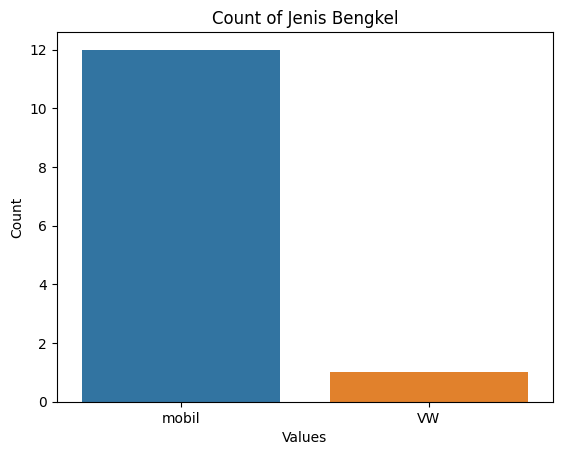

In [42]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, x='Jenis Bengkel')

# Memberikan judul dan label sumbu
plt.title('Count of Jenis Bengkel')
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

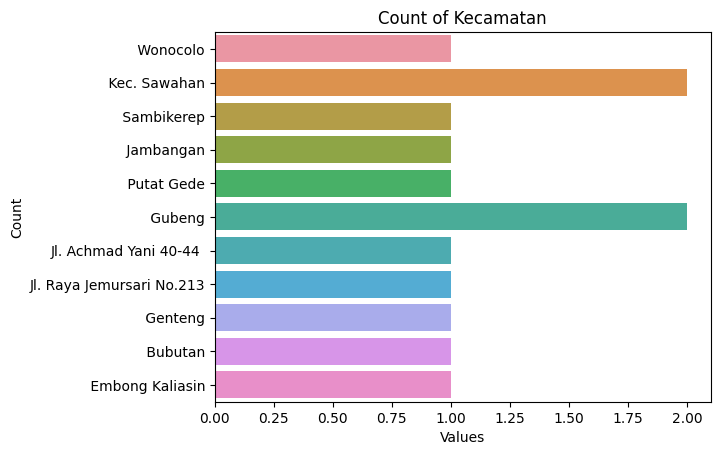

In [44]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, y='Kecamatan')

# Memberikan judul dan label sumbu
plt.title('Count of Kecamatan')
plt.xlabel('Values')
plt.ylabel('Count')
